In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.signal import fftconvolve, gaussian
import torch
from tqdm import trange

from tetris.game import TetrisGame
from tetris.agent import TetrisAgent
import rl.training as T
from rl.replay_buffer import ReplayBuffer

from IPython.display import clear_output

In [2]:
agent_save_path = 'tetris.pkl'
exp_replay_save_path = 'exp_replay.pkl'

lr = 1e-4
batch_size = 32
device = torch.device('cpu')
timesteps_per_epoch = 1
max_grad_norm = 50

refresh_target_network_freq = 5000
loss_freq = 50
eval_freq = 5000

In [3]:
def make_env():
    return TetrisGame(width=12, height=26)

env = make_env()
agent = TetrisAgent(ncols=12, nrows=26, nactions=4, epsilon=0.3).to(device)

In [4]:
# exp_replay = ReplayBuffer(size=1000)
with open(exp_replay_save_path, 'rb') as f:
    exp_replay = pickle.load(f)
    print(f'В буфере предзаписано {len(exp_replay)} шагов')
exp_replay._maxsize *= 2

В буфере предзаписано 6878 шагов


In [5]:
opt = torch.optim.Adam(agent.parameters(), lr=lr)

target_network = TetrisAgent(ncols=12, nrows=26, nactions=4).to(device)
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

In [6]:
mean_rw_history = []
td_loss_history = []
grad_norm_history = []
initial_state_v_history = []

def smoothen(values):
    kernel = gaussian(100, std=100)
    # kernel = np.concatenate([np.arange(100), np.arange(99, -1, -1)])
    kernel = kernel / np.sum(kernel)
    return fftconvolve(values, kernel, 'valid')

buffer size = 20000, epsilon = 0.30000


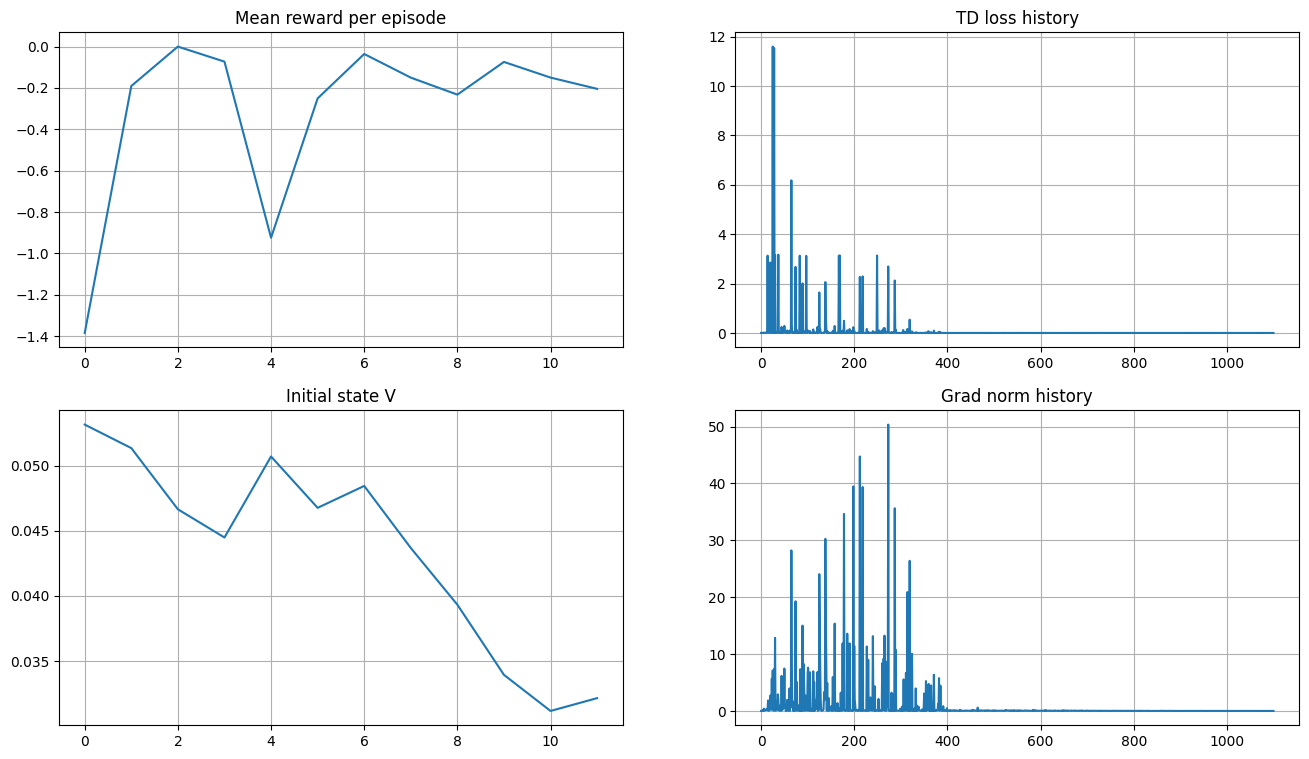

 10% 5007/50000 [00:40<24:27, 30.67it/s] 

 10% 5020/50000 [00:40<19:13, 38.99it/s]

 10% 5033/50000 [00:41<15:20, 48.87it/s]

 10% 5047/50000 [00:41<12:20, 60.74it/s]

 10% 5061/50000 [00:41<10:15, 73.04it/s]

 10% 5075/50000 [00:41<08:49, 84.88it/s]

 10% 5089/50000 [00:41<07:50, 95.54it/s]

 10% 5103/50000 [00:41<07:10, 104.19it/s]

 10% 5117/50000 [00:41<06:44, 111.09it/s]

 10% 5131/50000 [00:41<06:22, 117.25it/s]

 10% 5145/50000 [00:41<06:08, 121.78it/s]

 10% 5159/50000 [00:42<06:00, 124.44it/s]

 10% 5173/50000 [00:42<05:51, 127.53it/s]

 10% 5187/50000 [00:42<05:45, 129.68it/s]

 10% 5201/50000 [00:42<05:41, 131.14it/s]

 10% 5215/50000 [00:42<05:39, 132.08it/s]

 10% 5229/50000 [00:42<05:37, 132.72it/s]

 10% 5243/50000 [00:42<05:35, 133.44it/s]

 11% 5257/50000 [00:42<05:34, 133.93it/s]

 11% 5271/50000 [00:42<05:33, 134.05it/s]

 11% 5285/50000 [00:42<05:35, 133.34it/s]

 11% 5299/50000 [00:43<05:34, 133.56it/s]

 11% 5313/50000 [00:43<05:35, 133.28it/s]

 11% 5327/50000 [00:43<05:53, 126.41it/s]

 11% 5340/50000 [00:43<06:09, 120.87it/s]

 11% 5353/50000 [00:43<06:14, 119.18it/s]

 11% 5365/50000 [00:43<06:18, 118.05it/s]

 11% 5377/50000 [00:43<06:22, 116.65it/s]

 11% 5389/50000 [00:43<06:19, 117.58it/s]

 11% 5403/50000 [00:43<06:04, 122.35it/s]

 11% 5417/50000 [00:44<05:56, 125.17it/s]

 11% 5431/50000 [00:44<05:49, 127.68it/s]

 11% 5445/50000 [00:44<05:43, 129.54it/s]

 11% 5459/50000 [00:44<05:39, 131.02it/s]

 11% 5473/50000 [00:44<05:37, 132.05it/s]

 11% 5487/50000 [00:44<05:35, 132.61it/s]

 11% 5501/50000 [00:44<05:34, 133.00it/s]

 11% 5515/50000 [00:44<05:34, 132.82it/s]

 11% 5529/50000 [00:44<05:34, 132.82it/s]

 11% 5543/50000 [00:44<05:36, 132.24it/s]

 11% 5557/50000 [00:45<05:34, 132.80it/s]

 11% 5571/50000 [00:45<05:35, 132.58it/s]

 11% 5585/50000 [00:45<05:34, 132.68it/s]

 11% 5599/50000 [00:45<05:34, 132.93it/s]

 11% 5613/50000 [00:45<05:42, 129.66it/s]

 11% 5627/50000 [00:45<05:40, 130.29it/s]

 11% 5641/50000 [00:45<05:37, 131.36it/s]

 11% 5655/50000 [00:45<05:35, 132.36it/s]

 11% 5669/50000 [00:45<05:50, 126.64it/s]

 11% 5683/50000 [00:46<05:44, 128.65it/s]

 11% 5697/50000 [00:46<05:42, 129.31it/s]

 11% 5710/50000 [00:46<05:43, 129.12it/s]

 11% 5724/50000 [00:46<05:41, 129.75it/s]

 11% 5737/50000 [00:46<05:45, 128.30it/s]

 12% 5751/50000 [00:46<05:40, 129.78it/s]

 12% 5765/50000 [00:46<05:39, 130.21it/s]

 12% 5779/50000 [00:46<05:35, 131.68it/s]

 12% 5793/50000 [00:46<05:46, 127.59it/s]

 12% 5807/50000 [00:47<05:41, 129.46it/s]

 12% 5821/50000 [00:47<05:42, 129.07it/s]

 12% 5835/50000 [00:47<05:37, 130.96it/s]

 12% 5849/50000 [00:47<05:34, 131.91it/s]

 12% 5863/50000 [00:47<05:33, 132.43it/s]

 12% 5877/50000 [00:47<05:33, 132.22it/s]

 12% 5891/50000 [00:47<05:32, 132.48it/s]

 12% 5905/50000 [00:47<05:55, 123.94it/s]

 12% 5918/50000 [00:47<06:05, 120.63it/s]

 12% 5931/50000 [00:48<06:12, 118.39it/s]

 12% 5943/50000 [00:48<06:15, 117.47it/s]

 12% 5957/50000 [00:48<06:00, 122.02it/s]

 12% 5971/50000 [00:48<05:49, 125.84it/s]

 12% 5985/50000 [00:48<05:42, 128.61it/s]

 12% 5999/50000 [00:48<05:37, 130.51it/s]

 12% 6013/50000 [00:48<05:33, 132.04it/s]

 12% 6027/50000 [00:48<05:32, 132.44it/s]

 12% 6041/50000 [00:48<05:30, 132.82it/s]

 12% 6055/50000 [00:48<05:29, 133.40it/s]

 12% 6069/50000 [00:49<05:28, 133.93it/s]

 12% 6083/50000 [00:49<05:26, 134.47it/s]

 12% 6097/50000 [00:49<05:26, 134.41it/s]

 12% 6111/50000 [00:49<05:25, 134.89it/s]

 12% 6125/50000 [00:49<05:25, 134.83it/s]

 12% 6139/50000 [00:49<05:25, 134.87it/s]

 12% 6153/50000 [00:49<05:42, 128.12it/s]

 12% 6166/50000 [00:49<05:42, 127.87it/s]

 12% 6179/50000 [00:49<05:43, 127.56it/s]

 12% 6193/50000 [00:49<05:39, 128.98it/s]

 12% 6207/50000 [00:50<05:34, 130.83it/s]

 12% 6221/50000 [00:50<05:31, 132.18it/s]

 12% 6235/50000 [00:50<05:34, 130.96it/s]

 12% 6249/50000 [00:50<05:48, 125.67it/s]

 13% 6262/50000 [00:50<05:57, 122.28it/s]

 13% 6275/50000 [00:50<06:04, 119.97it/s]

 13% 6288/50000 [00:50<06:06, 119.38it/s]

 13% 6302/50000 [00:50<05:53, 123.76it/s]

 13% 6316/50000 [00:50<05:45, 126.46it/s]

 13% 6330/50000 [00:51<05:39, 128.76it/s]

 13% 6343/50000 [00:51<05:58, 121.63it/s]

 13% 6356/50000 [00:51<06:50, 106.20it/s]

 13% 6368/50000 [00:51<06:50, 106.40it/s]

 13% 6381/50000 [00:51<06:32, 111.20it/s]

 13% 6395/50000 [00:51<06:12, 117.17it/s]

 13% 6408/50000 [00:51<06:05, 119.34it/s]

 13% 6421/50000 [00:51<06:07, 118.66it/s]

 13% 6433/50000 [00:52<06:20, 114.65it/s]

 13% 6446/50000 [00:52<06:12, 116.78it/s]

 13% 6458/50000 [00:52<06:14, 116.33it/s]

 13% 6472/50000 [00:52<05:59, 120.94it/s]

 13% 6485/50000 [00:52<05:55, 122.24it/s]

 13% 6495/50000 [00:52<05:51, 123.65it/s]

In [8]:
# train loop
state = env.reset()

step = 0
try:
    for step in trange(step, step+50000):

        # play
        _, state = T.play_and_record(state, agent, env, exp_replay, timesteps_per_epoch)

        # train
        obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(batch_size)
        if np.sum(reward_batch) > 0:
            print(f'reward!: {np.sum(reward_batch)}')

        loss = T.compute_td_loss(device,
                                 obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch,
                                 agent, target_network,
                                 gamma=0.99, check_shapes=False)

        loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
        opt.step()
        opt.zero_grad()

        if step % refresh_target_network_freq == 0:
            # Load agent weights into target_network
            target_network.load_state_dict(agent.state_dict())

        if step % loss_freq == 0:
            td_loss_history.append(loss.data.cpu().item())
            grad_norm_history.append(grad_norm)

        if step % refresh_target_network_freq == 0:
            # Load agent weights into target_network
            target_network.load_state_dict(agent.state_dict())

        if step % eval_freq == 0:
            mean_rw_history.append(T.evaluate(
                make_env(), agent, n_games=5, greedy=True, t_max=1000, seed=step)
            )
            initial_state_q_values = agent.get_qvalues(make_env().reset(seed=step)[np.newaxis])
            initial_state_v_history.append(np.max(initial_state_q_values))

            clear_output(True)
            print("buffer size = %i, epsilon = %.5f" % (len(exp_replay), agent.epsilon))

            plt.figure(figsize=[16, 9])

            plt.subplot(2, 2, 1)
            plt.title("Mean reward per episode")
            plt.plot(mean_rw_history)
            plt.grid()

            assert not np.isnan(td_loss_history[-1])
            plt.subplot(2, 2, 2)
            # plt.title("TD loss history (smoothened)")
            # plt.plot(smoothen(td_loss_history))
            plt.title("TD loss history")
            plt.plot(td_loss_history)
            plt.grid()

            plt.subplot(2, 2, 3)
            plt.title("Initial state V")
            plt.plot(initial_state_v_history)
            plt.grid()

            plt.subplot(2, 2, 4)
            # plt.title("Grad norm history (smoothened)")
            # plt.plot(smoothen(grad_norm_history))
            plt.title("Grad norm history")
            plt.plot(grad_norm_history)
            plt.grid()

            plt.show()

except KeyboardInterrupt:
    # Обрабатываем Ctrl+C
    pass

In [16]:
print(step)

49999


In [9]:
torch.save(agent.state_dict(), agent_save_path)
print(f'Веса нейронной сети сохранены в {agent_save_path}')

Веса нейронной сети сохранены в tetris.pkl
